In [1]:
!pip install sentence-transformers matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 5.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [2]:
text = """
Formula 1 is the highest-class international racing competition with single-seat racing cars. Also, Formula 1 is the world’s most renowned motor racing competition. And there is no substitution for the F1 race.

Formula 1 includes team sports that require charging all 4 tyres on a car in under 2 seconds. In F1 race, racers are more like fighter pilots than sportspeople. Racers in Formula One face extreme G-forces and make harsh decisions in the blink of an eye when the speed of racing cars is at 370 km/h. To be the best racer, they push themselves to the very end and make use of incredibly innovative machines to their very limit.

Formula one drivers are competing for the F1 drivers championship while the other teams are fighting for the F1 constructor championship. The winner’s prize money is based on the position at the end of the season.

In Formula 1, each race is also known as the Grand Prix. It is also known that the Grand Prix is held at incredible locations throughout the world. The prediction has been made that 2024 will break the Grand Prix record of 24 races that is set to take place this season.

The location includes 21 countries across 5 continents in 2024 schedule. It includes classic tracks such as Silverstone, Spa-Francorchamps and Suzuka. Also, it includes the addition to the schedule such as Las Vegas, Maimi and Qartar.

It is seen that China has returned to the Formula 1 calendar for the first time since 2019 and will soon host the first F1 sprint in 2024.

This season they will be featuring seven rounds that will be spread out from May to September. Also, it will be staged in Europe except for the Indianapolis 500 in the United States where most F1 drivers sat out.

In the following decades, F1 developed has arrived at European events with amazing adventure. Also, adventure is now brought to South America, North America, Africa, Australia, and most recently to Middle East as well. Now, this is truly putting the world into

World championship.

In the very first campaign, the F1 calendar will feature Monaco, Monza, Silverstone, and Spa. For F1 safety arrangements have been made since then with new modifications.

Normally, Formula 1 weekend events usually take place in 3 days that are Friday, Saturday and Sunday.

On Friday, Formula 1 features free practice sessions (FP1 and FP2) for two 60-minute sessions. It is used to check whether racing cars are working properly, and if the car is not working properly, the changes can be done before the main race. So does the preparation will continue.

Onto Saturday, after the end of the final practice session (FP3), the drivers will be heading toward qualifying sessions. In qualifying sessions, the slowest five drivers with 18 minutes in the Q1 segment get eliminated. In the Q2 segment, five more will get eliminated in 15 minutes. Then the position will be set on the grid prior to that is 20–11 as per penalty. The final 12 minutes in the Q3 segment will decide the top 10 grid slots along with the fastest driver position.

The final race itself will be done on Sunday, where drivers will battle for scoring points. Also, drivers have to grab the spot on the podium where they have to take the chequered flag first to win.
"""

In [3]:
def recursive_split(text, max_length):

    # Base case: if the text is shorter than the max length, return it as is.
    if len(text) <= max_length:
        return [text]

    # Find the best place to split the text (ideally at a space).
    split_pos = text[:max_length].rfind(' ')
    if split_pos == -1:
        # If no space is found, split at the max_length.
        split_pos = max_length

    # Split the text at the found position.
    part1 = text[:split_pos].strip()
    part2 = text[split_pos:].strip()

    # Recursively split the remaining part.
    return [part1] + recursive_split(part2, max_length)


In [4]:
chunks = recursive_split(text, 100)

In [5]:
len(chunks)

34

In [6]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: fineGrained).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [7]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [8]:
embeddings = model.encode(chunks)

In [9]:
len(embeddings)

34

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

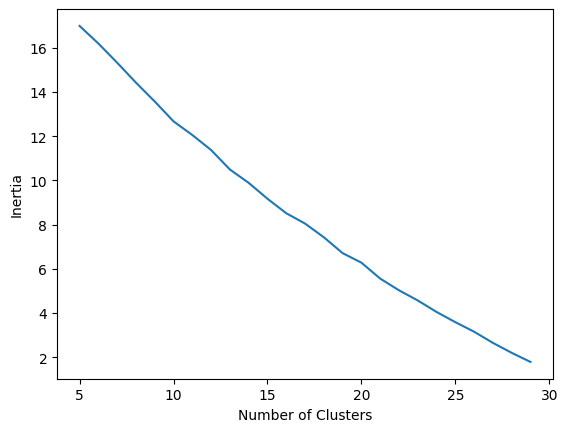

In [11]:
inertia=[]
for n in range(5, 30):
    kmeans = KMeans(n_clusters=n, random_state=42,n_init=10)
    kmeans.fit(embeddings)
    inertia.append(kmeans.inertia_)

plt.plot(range(5, 30), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [12]:
def find_optimal_clusters(inertia):
    deltas = np.diff(inertia, 2)
    elbow_index = np.argmax(deltas) + 5
    return elbow_index

In [13]:
optimal_num_clusters = find_optimal_clusters(inertia)
print("Optimal number of clusters:", optimal_num_clusters)

Optimal number of clusters: 18


In [14]:
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42, n_init=10)
kmeans.fit(embeddings)

KMeans(n_clusters=18, n_init=10, random_state=42)

In [15]:
labels = kmeans.labels_
labels

array([ 1,  1,  1,  9, 13, 11, 11,  9, 15, 10,  4,  4,  8, 14,  6,  0,  4,
        9, 17, 12,  0, 10,  6,  6,  2,  5, 16,  5,  5,  3,  3,  9, 15,  7],
      dtype=int32)

In [16]:
def get_count(arr):
    count = {}
    for item in arr:
        if item in count:
            count[item] += 1
        else:
            count[item] = 1
    count = dict(sorted(count.items(), key=lambda x: x[0]))
    for cluster, items in count.items():
        print(f"Cluster {cluster}: {items} items")

In [17]:
get_count(labels)


Cluster 0: 2 items
Cluster 1: 3 items
Cluster 2: 1 items
Cluster 3: 2 items
Cluster 4: 3 items
Cluster 5: 3 items
Cluster 6: 3 items
Cluster 7: 1 items
Cluster 8: 1 items
Cluster 9: 4 items
Cluster 10: 2 items
Cluster 11: 2 items
Cluster 12: 1 items
Cluster 13: 1 items
Cluster 14: 1 items
Cluster 15: 2 items
Cluster 16: 1 items
Cluster 17: 1 items


In [18]:
from sklearn.metrics.pairwise import euclidean_distances

In [19]:
def calculate_variances(embeddings, labels, n_clusters):
    variances = []
    for i in range(n_clusters):
        cluster_embeddings = embeddings[labels == i]
        if len(cluster_embeddings) > 1:
            cluster_center = np.mean(cluster_embeddings, axis=0)
            distances = euclidean_distances(cluster_embeddings, cluster_center.reshape(1, -1)).flatten()
            variance = np.var(distances)
        else:
            variance = 0
        variances.append(variance)
    return variances

In [20]:
variances = calculate_variances(embeddings, labels, optimal_num_clusters)
variances

[0.0,
 0.0012999359,
 0,
 4.440892e-16,
 0.00092896185,
 0.0024489616,
 0.0033297,
 0,
 0,
 0.0020402132,
 0.0,
 0.0,
 0,
 0,
 0,
 0.0,
 0,
 0]

In [21]:
def sample_chunks(embeddings, labels, n_clusters, base_sample_size=1):
    # Calculate variances
    variances = calculate_variances(embeddings, labels, n_clusters)
    print(variances)
    print()
    # Normalize variances to use as weights for sampling
    total_variance = sum(variances)
    if total_variance == 0:
        weights = [1/n_clusters] * n_clusters
    else:
        weights = [var / total_variance for var in variances]

    # Determine number of samples for each cluster based on weights
    sample_sizes = [max(base_sample_size, int(weight * len(embeddings))) for weight in weights]
    print(sample_sizes)

    # Sample chunks from each cluster
    sampled_chunks = []
    for i in range(n_clusters):
        cluster_indices = np.where(labels == i)[0]
        np.random.shuffle(cluster_indices)
        sample_size = min(sample_sizes[i], len(cluster_indices))
        sampled_chunks.append(cluster_indices[:sample_size].tolist())

    return sampled_chunks

In [22]:
sample = sample_chunks(embeddings, labels, optimal_num_clusters)

[0.0, 0.0012999359, 0, 4.440892e-16, 0.00092896185, 0.0024489616, 0.0033297, 0, 0, 0.0020402132, 0.0, 0.0, 0, 0, 0, 0.0, 0, 0]

[1, 4, 1, 1, 3, 8, 11, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1]


In [23]:
sample

[[20],
 [2, 0, 1],
 [24],
 [29],
 [16, 10, 11],
 [28, 25, 27],
 [22, 14, 23],
 [33],
 [12],
 [17, 31, 7, 3],
 [21],
 [6],
 [19],
 [4],
 [13],
 [8],
 [26],
 [18]]

In [24]:
len(sample)

18

In [25]:
corpus = []
for i in range(len(sample)):
  tmp = []
  for j in sample[i]:
    tmp.append(chunks[j])
  corpus.append(tmp)


In [26]:
len(corpus)

18

In [27]:
corpus[0:2]

[['putting the world into\n\nWorld championship.\n\nIn the very first campaign, the F1 calendar will'],
 ['for the F1 race.\n\nFormula 1 includes team sports that require charging all 4 tyres on a car in',
  'Formula 1 is the highest-class international racing competition with single-seat racing cars.',
  'Also, Formula 1 is the world’s most renowned motor racing competition. And there is no substitution']]

In [28]:
tensor_corpus = []
for i in range(len(sample)):
  tmp = []
  for j in sample[i]:
    tmp.append(embeddings[j])
  tensor_corpus.append(tmp)

In [29]:
len(tensor_corpus[0])

1

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
def extract_keywords_from_clusters(clustered_corpus, top_n=4):
    """
    Extract keywords from each cluster using TF-IDF.

    Parameters:
    clustered_corpus (list of list of str): A 2D list where each inner list contains the sampled chunks of a particular cluster.
    top_n (int): The number of top keywords to extract from each cluster.

    Returns:
    cluster_keywords (list of list): A 2D list where each inner list contains the top keywords for a particular cluster.
    """
    cluster_keywords = []

    for cluster in clustered_corpus:
        # Concatenate all chunks in the cluster to form a single document
        concatenated_text = " ".join(cluster)

        # Apply TF-IDF vectorizer
        vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
        tfidf_matrix = vectorizer.fit_transform([concatenated_text])

        # Get the feature names (i.e., the terms)
        feature_names = vectorizer.get_feature_names_out()

        # Get the TF-IDF scores for the terms
        tfidf_scores = tfidf_matrix.toarray()[0]

        # Get the top_n terms based on TF-IDF scores
        top_indices = np.argsort(tfidf_scores)[-top_n:][::-1]
        top_keywords = [feature_names[idx] for idx in top_indices]

        cluster_keywords.append(top_keywords)

    return cluster_keywords

In [32]:
keywords = extract_keywords_from_clusters(corpus)
for cluster in range(len(keywords)):
    print(f"Cluster {cluster}: {keywords[cluster]}")

Cluster 0: ['world', 'putting', 'f1', 'championship']
Cluster 1: ['formula', 'racing', 'competition', 'team']
Cluster 2: ['working', 'used', 'sessions', 'racing']
Cluster 3: ['set', 'prior', 'position', 'minutes']
Cluster 4: ['world', 'staged', 'spread', 'set']
Cluster 5: ['segment', 'sessions', 'qualifying', 'drivers']
Cluster 6: ['formula', 'friday', 'time', 'usually']
Cluster 7: ['win', 'flag', 'chequered']
Cluster 8: ['tracks', 'spa', 'silverstone', 'schedule']
Cluster 9: ['f1', 'drivers', 'championship', 'race']
Cluster 10: ['spa', 'silverstone', 'safety', 'monza']
Cluster 11: ['machines', 'limit', 'innovative', 'incredibly']
Cluster 12: ['truly', 'recently', 'north', 'middle']
Cluster 13: ['speed', 'make', 'harsh', 'formula']
Cluster 14: ['vegas', 'suzuka', 'schedule', 'qartar']
Cluster 15: ['winner', 'season', 'race', 'prize']
Cluster 16: ['session', 'saturday', 'preparation', 'practice']
Cluster 17: ['adventure', 'south', 'european', 'events']


In [33]:
keywords

[['world', 'putting', 'f1', 'championship'],
 ['formula', 'racing', 'competition', 'team'],
 ['working', 'used', 'sessions', 'racing'],
 ['set', 'prior', 'position', 'minutes'],
 ['world', 'staged', 'spread', 'set'],
 ['segment', 'sessions', 'qualifying', 'drivers'],
 ['formula', 'friday', 'time', 'usually'],
 ['win', 'flag', 'chequered'],
 ['tracks', 'spa', 'silverstone', 'schedule'],
 ['f1', 'drivers', 'championship', 'race'],
 ['spa', 'silverstone', 'safety', 'monza'],
 ['machines', 'limit', 'innovative', 'incredibly'],
 ['truly', 'recently', 'north', 'middle'],
 ['speed', 'make', 'harsh', 'formula'],
 ['vegas', 'suzuka', 'schedule', 'qartar'],
 ['winner', 'season', 'race', 'prize'],
 ['session', 'saturday', 'preparation', 'practice'],
 ['adventure', 'south', 'european', 'events']]

In [34]:
!pip install pyvis
import networkx as nx
from pyvis.network import Network

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.5 MB/s eta 0:00:00


In [35]:
def create_dag(labels, keywords):
    """
    Create a directed acyclic graph (DAG) from the cluster labels and keywords.

    Parameters:
    labels (np.ndarray): Array of cluster labels for each chunk.
    keywords (list of list of str): A 2D list where each inner list contains the top keywords for a particular cluster.

    Returns:
    G (networkx.DiGraph): A directed acyclic graph representing the topics and their transitions.
    """
    G = nx.DiGraph()

    # Create nodes for each topic in each cluster
    for i, cluster_keywords in enumerate(keywords):
        for keyword in cluster_keywords:
            G.add_node(f"Cluster {i+1}")

    # Add edges based on the sequence of labels
    for i in range(len(labels) - 1):
        from_cluster = labels[i]
        to_cluster = labels[i + 1]
        if from_cluster != to_cluster:
            from_topic = f"Cluster {from_cluster+1}"
            to_topic = f"Cluster {to_cluster+1}"
            G.add_edge(from_topic, to_topic)
    print(labels)

    return G

In [36]:
def visualize_dag(G):
    """
    Visualize the directed acyclic graph (DAG).

    Parameters:
    G (networkx.DiGraph): A directed acyclic graph representing the topics and their transitions.
    """
    net = Network(notebook=True, directed=True)

    # Convert NetworkX graph to PyVis
    pos = nx.circular_layout(G)  # Positions for all nodes

    plt.figure(figsize=(8, 7))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", edge_color="gray")

    plt.title("DAG Visualization", size=15)
    plt.show()

In [37]:
def list_clusters():
  for i in range(len(keywords)):
    print(f"Cluster {i+1}: {keywords[i]}")

[ 1  1  1  9 13 11 11  9 15 10  4  4  8 14  6  0  4  9 17 12  0 10  6  6
  2  5 16  5  5  3  3  9 15  7]


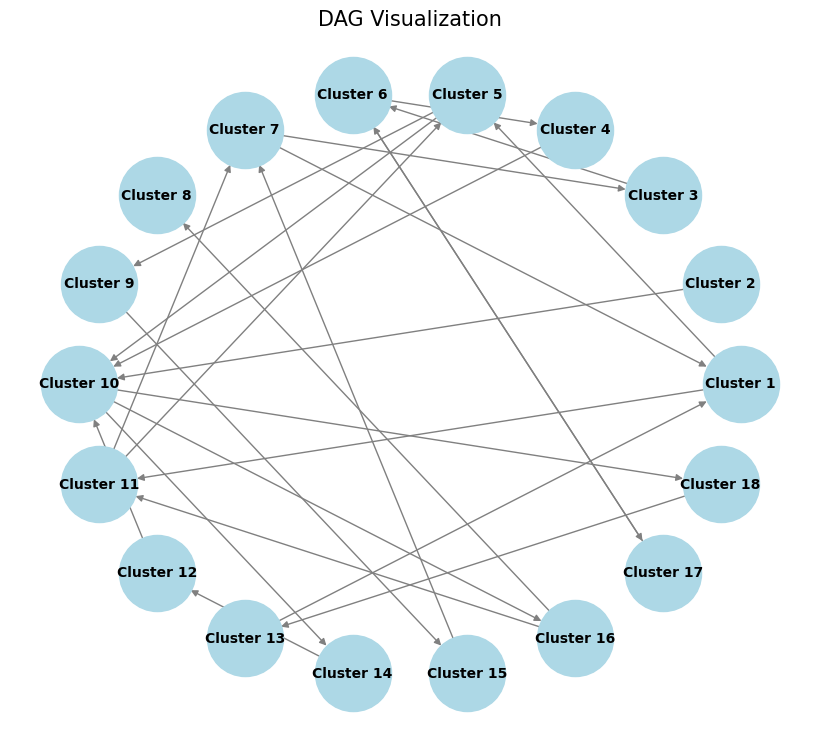

In [38]:
G = create_dag(labels, keywords)

# Visualize the DAG interactively
visualize_dag(G)
list_clusters()

In [39]:
centers=kmeans.cluster_centers_
centers

Cluster 1: ['world', 'putting', 'f1', 'championship']
Cluster 2: ['formula', 'racing', 'competition', 'team']
Cluster 3: ['working', 'used', 'sessions', 'racing']
Cluster 4: ['set', 'prior', 'position', 'minutes']
Cluster 5: ['world', 'staged', 'spread', 'set']
Cluster 6: ['segment', 'sessions', 'qualifying', 'drivers']
Cluster 7: ['formula', 'friday', 'time', 'usually']
Cluster 8: ['win', 'flag', 'chequered']
Cluster 9: ['tracks', 'spa', 'silverstone', 'schedule']
Cluster 10: ['f1', 'drivers', 'championship', 'race']
Cluster 11: ['spa', 'silverstone', 'safety', 'monza']
Cluster 12: ['machines', 'limit', 'innovative', 'incredibly']
Cluster 13: ['truly', 'recently', 'north', 'middle']
Cluster 14: ['speed', 'make', 'harsh', 'formula']
Cluster 15: ['vegas', 'suzuka', 'schedule', 'qartar']
Cluster 16: ['winner', 'season', 'race', 'prize']
Cluster 17: ['session', 'saturday', 'preparation', 'practice']
Cluster 18: ['adventure', 'south', 'european', 'events']


array([[ 0.01365545,  0.03668018, -0.02215859, ..., -0.04519777,
        -0.00195265,  0.0378288 ],
       [ 0.01078638,  0.02982303, -0.03591795, ..., -0.02725921,
         0.08684795,  0.02202321],
       [-0.04630701,  0.06919832, -0.06327661, ...,  0.08243778,
        -0.03067669, -0.05133273],
       ...,
       [-0.03187174,  0.07134598, -0.00555433, ..., -0.00506152,
         0.03610894,  0.04551318],
       [ 0.02651495, -0.02974671,  0.00735049, ..., -0.00668663,
        -0.05561092,  0.02479776],
       [ 0.07308104,  0.0082062 , -0.01331262, ..., -0.03499891,
        -0.05979995, -0.00945937]], dtype=float32)

In [40]:
import numpy as np

def calculate_distances(points):
    n = len(points)
    distances = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            distance = np.linalg.norm(points[i] - points[j])
            distances[i, j] = distance
            distances[j, i] = distance  # Because distance is symmetric

    # Normalize the distances
    max_distance = np.max(distances)
    if max_distance > 0:  # To avoid division by zero
        distances = distances / max_distance

    return distances

In [41]:
weights=calculate_distances(centers)
weights

array([[0.        , 0.55223781, 0.84383264, 0.72926875, 0.47278417,
        0.61635589, 0.54542232, 0.81209802, 0.68768741, 0.47907243,
        0.57127329, 0.64469872, 0.86026744, 0.7926444 , 0.73032124,
        0.56221953, 0.73812548, 0.81761881],
       [0.55223781, 0.        , 0.78932367, 0.78382295, 0.58227826,
        0.57011893, 0.53402787, 0.81966145, 0.76920684, 0.48078617,
        0.53137649, 0.51339798, 0.8580071 , 0.69398878, 0.77070937,
        0.50907867, 0.84813818, 0.8533994 ],
       [0.84383264, 0.78932367, 0.        , 0.77260052, 0.81996707,
        0.6761999 , 0.77634925, 0.91891285, 0.9117136 , 0.74291199,
        0.7860226 , 0.79268569, 1.        , 0.91517407, 0.92904693,
        0.74984813, 0.83491365, 0.99175649],
       [0.72926875, 0.78382295, 0.77260052, 0.        , 0.70064842,
        0.58335399, 0.7001723 , 0.7685233 , 0.87115983, 0.6732315 ,
        0.75275015, 0.7888543 , 0.90993209, 0.82739364, 0.83089655,
        0.66668187, 0.7225559 , 0.93355956],
    

In [42]:
len(weights),len(weights[0])

(18, 18)

In [43]:
def create_weighted_graph(labels, keywords, weights):
    """
    Create a directed weighted from the cluster labels and keywords.

    Parameters:
    labels (np.ndarray): Array of cluster labels for each chunk.
    keywords (list of list of str): A 2D list where each inner list contains the top keywords for a particular cluster.
    weights (np.ndarray): A 2D matrix of weights representing the transition weights between clusters.

    Returns:
    G (networkx.DiGraph): A directed weighted graph representing the topics and their transitions.
    """
    G = nx.DiGraph()

    # Create nodes for each topic in each cluster
    for i, cluster_keywords in enumerate(keywords):
        for keyword in cluster_keywords:
            G.add_node(f"Cluster {i+1}")

    # Add edges based on the sequence of labels
    for i in range(len(labels) - 1):
        from_cluster = labels[i]
        to_cluster = labels[i + 1]
        if from_cluster != to_cluster:
            from_topic = f"Cluster {from_cluster+1}"
            to_topic = f"Cluster {to_cluster+1}"
            weight=weights[from_cluster][to_cluster]
            G.add_edge(from_topic, to_topic,weight=weight)
    print(labels)

    return G

In [44]:
def visualize_weighted_graph(G):
    """
    Visualize the directed weighted graph (DAG) with edge weights.

    Parameters:
    G (networkx.DiGraph): A directed weighted graph representing the topics and their transitions.
    """
    net = Network(notebook=True, directed=True)

    # Convert NetworkX graph to PyVis
    pos = nx.circular_layout(G)  # Positions for all nodes

    plt.figure(figsize=(8, 7))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", edge_color="gray")

    # Draw edge labels
    edge_labels = nx.get_edge_attributes(G, 'weight')
    for i in edge_labels:
        edge_labels[i]=round(edge_labels[i],4)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)

    plt.title("DAG Visualization", size=15)
    plt.show()

[ 1  1  1  9 13 11 11  9 15 10  4  4  8 14  6  0  4  9 17 12  0 10  6  6
  2  5 16  5  5  3  3  9 15  7]


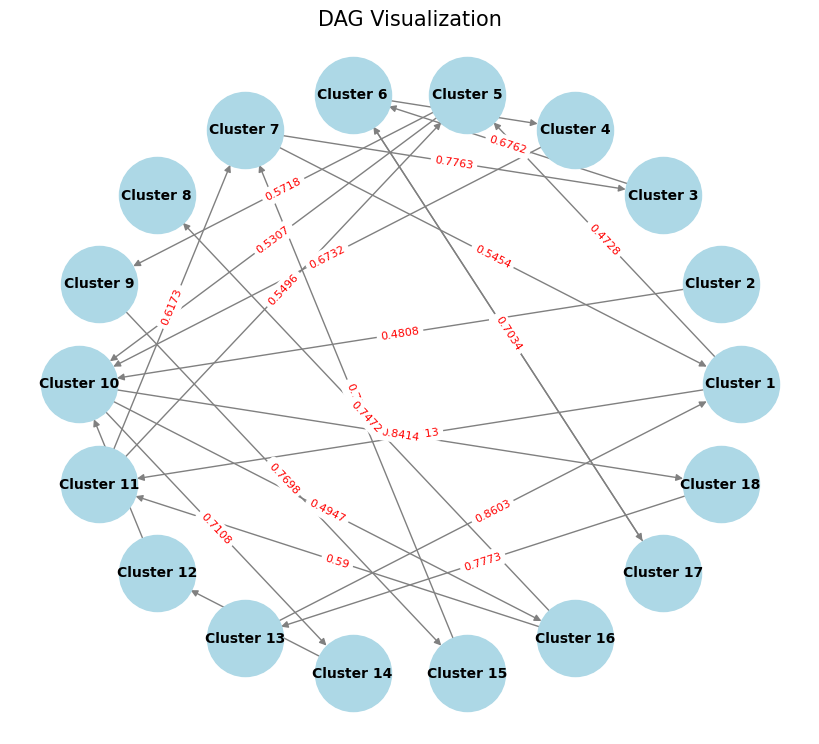

Cluster 1: ['world', 'putting', 'f1', 'championship']
Cluster 2: ['formula', 'racing', 'competition', 'team']
Cluster 3: ['working', 'used', 'sessions', 'racing']
Cluster 4: ['set', 'prior', 'position', 'minutes']
Cluster 5: ['world', 'staged', 'spread', 'set']
Cluster 6: ['segment', 'sessions', 'qualifying', 'drivers']
Cluster 7: ['formula', 'friday', 'time', 'usually']
Cluster 8: ['win', 'flag', 'chequered']
Cluster 9: ['tracks', 'spa', 'silverstone', 'schedule']
Cluster 10: ['f1', 'drivers', 'championship', 'race']
Cluster 11: ['spa', 'silverstone', 'safety', 'monza']
Cluster 12: ['machines', 'limit', 'innovative', 'incredibly']
Cluster 13: ['truly', 'recently', 'north', 'middle']
Cluster 14: ['speed', 'make', 'harsh', 'formula']
Cluster 15: ['vegas', 'suzuka', 'schedule', 'qartar']
Cluster 16: ['winner', 'season', 'race', 'prize']
Cluster 17: ['session', 'saturday', 'preparation', 'practice']
Cluster 18: ['adventure', 'south', 'european', 'events']


In [45]:
G = create_weighted_graph(labels, keywords,weights)

visualize_weighted_graph(G)
list_clusters()